# Pre-laboratorio 4.1

## Regresión logística con gradiente estocástico

En este problema aplicaremos el algoritmo de descenso de gradiente estocástico a un método de clasificación supervisada denominado **regresión logística**.  Consideramos un conjunto de $M$ datos correspondiente a vectores   $\{x^{(m)}\}_{i=1,\dots,M} \subset \mathbb{R}^p$ de características,  y  sus respectivas etiquetas  $\{y^{(m)}\}_{i=1,\dots,M} \subset \{0,1\}$ que indican si cada uno de ellos pertenece a  una de dos "clases" posibles $C_0$ ó $C_1$. El objetivo es usar estos datos para aprender como clasificar correctamente cualquier vector nuevo $x$ de características  en una de las clases $C_k$, $k=0,1$ (sin ver su etiqueta).

Por simplicidad nos restringiremos a modelos de clasificación lineales, los que pueden escribirse de manera general como
$$  \phi(x)=\sigma\left( \langle a, x\rangle + b  \right), $$
donde  $x\in \mathbb{R}^p$, $a\in \mathbb{R}^p$  y $b\in \mathbb{R}$ son parámetros fijos,  y $\sigma: \mathbb{R}\to [0,1]$ es una función "de activación", creciente, no lineal, fija,  que se usará para atribuir el vector $x$ a la clase $C_1$ o $C_0$ seg\'un si el valor de $\phi$ está por encima o debajo de un cierto umbral (por ejemplo, etiquetar $x$ como de clase $C_1$ si $\phi(x)=\sigma   ( a^\mathrm{t}x + b) \in (1/2, 1]$, y de clase $C_0$ en caso contrario).

Para simplificar la notación introducimos la  escritura
$$  \sigma(w^\mathrm{t}x) =  \sigma\left( \langle a, x \rangle+ b  \right), $$
donde  $w = (a,b)\in \mathbb{R}^{p+1}$ y, con abuso de notaci\'on, $x$ en el lado izquierdo corresponde  al vector agrandado $ (x,1)\in\mathbb{R}^{p+1}$.  Puesto que $\sigma(w^\mathrm{t}x)\in (0,1)$ podemos pensar  intuitivamente en esta cantidad como  "probabilidad" de que un vector de características aleatorias  $x$  provenga de la clase $C_1$.  

Escogeremos como $\sigma$ la llamada función logística o sigmoide: 
$$ \phi(r)=\sigma(r) = \frac{1}{1+e^{-r}}. $$

Supondremos además que cada observación $(x^{(1)},y^{(1)}),\dots,(x^{(m)},y^{(m)})$ se obtiene de manera independientemente, sampleando, para cada una, primero una clase $y^{(m)}\in \{0,1\}$ y luego un vector de características $x^{(m)}$ aleatorias de datos de clase $C_{y^{(m)}}$.

Para encontrar el parámetro $w = (a,b)\in \mathbb{R}^{p+1} $ que mejor explica las etiquetas de los datos observados $(x^{(1)},y^{(1)}),\dots,(x^{(m)},y^{(m)})$, se propone maximizar la función de "verosimilitud" 
$$ \prod_{m=1}^M \sigma\bigl( w^\mathrm{t}x^{(m)} \bigr)^{y^{(m)}} \Bigl( 1 - \sigma\bigl( w^\mathrm{t}x^{(m)}\bigr) \Bigr)^{(1-y^{(m)})}, $$
lo cual es equivalente a minimizar la función de pérdida
$$ L(w) = -\frac{1}{M}\sum_{m=1}^My^{(m)}\log \sigma\bigl(w^\mathrm{t}x^{(m)}\bigr) + (1-y^{(m)})\log\Bigl(1-\sigma\bigl(w^\mathrm{t}x^{(m)}\bigr)\Bigr). $$

Volviendo atrás, veamos que la intepretación probabilista antes mecionada es rigurosa para el caso de un modelo Bayesiano  en que los datos son generados por dos posibles leyes Gaussianas multivariadas. De manera más precisa supongamos que, condicionalmente a que el dato $x$ proviene de la clase  $C_i$, $i\in\{0,1\}$, se tiene que $  x\sim {\cal N}( \mu_i , \Sigma)$ normal multivariada en $\mathbb{R}^p$ de media $\mu_i$ y  varianza-covarianza no singular $\Sigma$ (igual para ambas clases).  Supongamos adem\'as que cada dato proviene de una clase $C_i$, que tiene probabilidad a priori $p(C_i)\in (0,1)$ de ser elegida para generar ese dato.  

> 1 - Explicite $p(x\vert C_i)$  para $i=0,1$ y muestre que $p(C_1\vert x)$ esta dada por
> $$ p(C_1\vert x)=  \sigma (w^\mathrm{t}x )= \frac{1}{1+ \exp{(-\langle a, x\rangle - b)}}, $$
> con
> $$ a= \Sigma^{-1}(\mu_1-\mu_0)\text{ y } b= \frac{1}{2} (\mu_0^\mathrm{t}  \Sigma^{-1} \mu_0 - \mu_1^\mathrm{t} \Sigma^{-1} \mu_1)+ \ln\left(\frac{p(C_1)}{p(C_0)}\right).$$

**Respuesta**

En efecto, dada una clase $C_i$ con $i\in\{0,1\}$, la probabilidad de un punto $x$ sabiéndose que viene de $C_i$ está dada por la densidad de una distribución Gaussiana:
$$ p(x|C_i)=\frac{exp(-\frac{1}{2}(x-\mu_i)^T\Sigma^{-1}(x-\mu_i))}{\sqrt{(2\pi)^p|\Sigma|}}$$
Queremos demostrar que para $i=1$ ($i=0$ es análogo)
$$ p(C_1|x)=\sigma(\omega^Tx)=\frac{1}{1+exp(-\langle a,x\rangle-b)}$$
con $a=\Sigma^{-1}(\mu_1-\mu_0)$ y $b=\frac{1}{2}(\mu_o^T\Sigma^{-1}\mu_0-\mu_1^T\Sigma^{-1}\mu_1)+ln(\frac{p(C_1)}{p(C_0)})$
Primero notemos que
$$p(x)=\sum_{\theta\in\Theta}p(x,\theta)=\sum_{\theta\in\Theta}p(x|\theta)p(\theta)=p(x|C_1)p(C_1)+p(x|C_2)p(C_2)$$
Para esto tenemos una expresión cerrada. Además por teorema de Bayes
$$ p(C_1|x)=\frac{p(x|C_1)p(C1)}{p(x)}$$
Entonces basta demostrar que $\frac{1}{p(C_1|x)}=\frac{p(x)}{p(x|C_1)p(C1)}=1+exp(-\langle a,x\rangle-b)$.
$$ \frac{p(x)}{p(x|C_1)p(C1)}=\frac{p(x|C_1)p(C_1)+p(x|C_0)p(C_0)}{p(x|C_1)p(C1)}=1+\frac{p(x|C_0)p(C_0)}{p(x|C_1)p(C1)}$$
Efectivamente tenemos que
$$ \frac{p(x|C_0)p(C_0)}{p(x|C_1)p(C1)}=\frac{exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0))}{\sqrt{(2\pi)^p|\Sigma|}}\frac{\sqrt{(2\pi)^p|\Sigma|}}{exp(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))}\frac{p(C_0)}{p(C_1))}$$
$$ = exp((-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)+\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))+ln(\frac{p(C_0)}{p(C_1)})$$
$$ = exp((-x^T\Sigma^{-1}x-\frac{1}{2}(\mu_1-\mu_0)^T\Sigma^{-1}(\mu_1-\mu_0)+ln(\frac{p(C_0)}{p(C_1)}))$$
Que corresponde a lo que buscábamos.

---

## Pytorch

_Pytorch_ es una biblioteca para _python_ que nos permite definir y entrenar modelos de forma rápida. Junto con otras herramientas como _TensorFlow_, estos llamados frameworks de aprendizaje profundo realizan cálculos de manera rápida usando tensores (un análogo a arreglos de _numpy_, algo así como matrices generalizadas) y aprovechando el poder de las GPUs para distribuir los cálculos.

Estos frameworks utilizan variantes del algoritmo de **backpropagation**, que guarda las computaciones realizadas en cada punto del modelo para luego calcular y "propagar" de manera fácil y rápida el gradiente del modelo con respecto a un conjunto de datos. Esto da pie al uso de algoritmos basados en el gradiente, como es el caso de **descenso de gradiente estocástico**.

Para esto es necesario instalar la biblioteca, para lo cual seguiremos las instrucciones en [este enlace](https://pytorch.org/get-started/locally/), dependiendo de nuestro sistema operativo y ambiente _python_. Para Windows, instalar _pytorch_ en un ambiente _conda_ sin soporte _CUDA_ (GPU dedicada) correríamos lo siguiente:

```conda install pytorch cpuonly -c pytorch```

Nota: no es necesario, para efectos de este curso, instalar bibliotecas anexas como _torchvision_, _torchaudio_ o _torchtext_.

Ahora que tenemos la instalación veamos como es la estructura general de un modelo _pytorch_.

In [1]:
import torch
from torch import nn

class RegresionLogistica(nn.Module):
    def __init__(self,input_size):
        super().__init__()
        self.lineal = nn.Linear(input_size, 1)
        self.sigma = nn.Sigmoid()

    def forward(self, xb):
        xb = self.lineal(xb)
        output = self.sigma(xb)
        return output

Una de las formas posibles de actualizar los parámetros de un modelo (no realmente la que se suele usar, pero sirve para entender lo que estamos haciendo) es lo siguiente:

In [ ]:
modelo = RegresionLogistica(dim)

with torch.no_grad():
    for p in modelo.parameters(): p -= p.grad * paso
    modelo.zero_grad()

Previamente a ese paso debemos tener los gradientes actualizados. En _pytorch_ se define de antemano una función de pérdida. Una vez que invocamos esa función en algún conjunto de datos, declaramos como `loss` a esa evaluación para luego ejecutar `loss.backward()`.

Note que [Binary Cross Entropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) implementa justamente la función que buscamos. 

> 2 - Usando _pytorch_ implemente el algoritmo de descenso de gradiente estocástico mini-batch para minimizar $L(\omega)$

In [2]:
import numpy as np

class SGD:
    def __init__(self,lr,modelo,perdida):
        """Inicia la clase que implementa descenso de gradiente

        Parametros
        ----------
            lr: función de python
                función de los naturales a los reales que define el paso
            modelo: objeto submódulo de nn.Module
                modelo para el cual optimizaremos parámetros
            perdida: objeto submódulo de nn
                función de périda de pytorch
        """
        self.lr = lr
        self.model = modelo
        self.loss_func = perdida
        self._loss = []

    def updt_loss(self,loss):
        self._loss.append(loss.item())

    def fit(self,X_train,y_train,epochs,batchsize):
        """Método que ajusta el modelo"""
        n = X_train.shape[0]
        for epoch in range(epochs):
            for i in range((n - 1) // batchsize + 1):
                start_i = i * batchsize
                end_i = start_i + batchsize
                xb = X_train[start_i:end_i]
                yb = y_train[start_i:end_i]
                pred = self.model(xb)[:,0]
                loss = self.loss_func(pred, yb)
                self.updt_loss(loss)

                loss.backward()
                with torch.no_grad():
                    for p in self.model.parameters():
                        p -= p.grad * self.lr(i)
                    self.model.zero_grad()
            print("Epoca {} de {}".format(epoch+1,epochs))

    @property
    def loss(self):
        return np.array(self._loss)

> 3 - Usando el [módulo distributions](https://pytorch.org/docs/stable/distributions.html) de _pytorch_ para samplear $4000$ muestras provenientes de dos distribuciones Gaussianas equiprobables. Grafíquelas junto con el intervalo separador teórico. Prepare tensores `X_train` e `y_train`. Pueden serle útiles los métodos [randperm](https://pytorch.org/docs/stable/generated/torch.randperm.html) y [cat](https://pytorch.org/docs/stable/generated/torch.cat.html) de la biblioteca _pytorch_.

In [3]:
torch.manual_seed(0)
from torch.distributions import MultivariateNormal, Binomial

N = 4000

values = Binomial(probs=torch.tensor([0.5])).sample(torch.tensor([N]))
n1 = (values == 0).sum().reshape((1,))
n2 = (values == 1).sum().reshape((1,))
samples1 = MultivariateNormal(torch.zeros(2), torch.tensor([[1,0],[0,2.5]])).sample(n1)
samples2 = MultivariateNormal(torch.tensor([3.,3.]), torch.tensor([[1,0],[0,2.5]])).sample(n2)

samples = np.zeros((N,2))
samples[(values==0).numpy()[:,0]] = samples1.numpy()
samples[(values==1).numpy()[:,0]] = samples2.numpy()

In [4]:
def w_teorico(mu0,mu1,Sigma):
    """Retorna los parámetros de la recta separadora teórica"""
    w = np.zeros(3)
    w[2] = 0.5*(np.dot(np.dot(mu0,np.linalg.inv(Sigma)),mu0)-np.dot(np.dot(mu1,np.linalg.inv(Sigma)),mu1))
    w[:2] = np.dot(np.linalg.inv(Sigma),mu1-mu0)
    return w

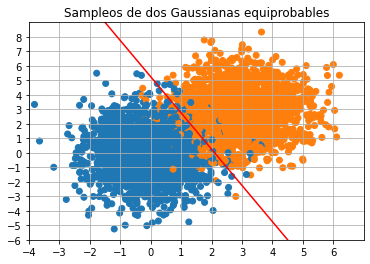

In [5]:
from plot import plot_samples2d

w = w_teorico(np.array([0,0]),np.array([3,3]),np.array([[1,0],[0,2.5]]))
plot_samples2d(samples,values.detach().numpy().reshape((-1,)),w,title="Sampleos de dos Gaussianas equiprobables")

In [6]:
X_train = torch.cat((samples1,samples2))
y_train = torch.cat((torch.Tensor([0 for _ in range(n1)]),torch.Tensor([1 for _ in range(n2)])))
indices = torch.randperm(N)
X_train = torch.index_select(X_train, 0, indices)
y_train = torch.index_select(y_train, 0, indices)

In [7]:
print(X_train.shape)
print(y_train.shape)

torch.Size([4000, 2])
torch.Size([4000])


> 4.a - Utilice el algoritmo para encontrar  el hiperplano  que mejor separa las dos Gaussianas en cada caso. Para el paso considere sucesiones del estilo  
> $$\gamma_t = \frac{\gamma_0}{1+t/t_0},$$
> con  distintos valores de parámetros (por ejemplo $t_0 = 100$ y $\gamma_0 = 0.05$).Compare los resultados obtenidos con el  hiperplano $w$ teórico para esas Gaussianas. Grafique los hiperplanos obtenidos junto con (parte de) las nubes de datos.

In [8]:
def gamma(gamma0,t0):
    return lambda t: gamma0/(1+t/t0)

In [9]:
modelo = RegresionLogistica(2)
perdida = nn.BCELoss()
sgd1 = SGD(gamma(0.5,100),modelo,perdida)

In [10]:
sgd1.fit(X_train,y_train,epochs=10,batchsize=20)

Epoca 1 de 10
Epoca 2 de 10
Epoca 3 de 10
Epoca 4 de 10
Epoca 5 de 10
Epoca 6 de 10
Epoca 7 de 10
Epoca 8 de 10
Epoca 9 de 10
Epoca 10 de 10


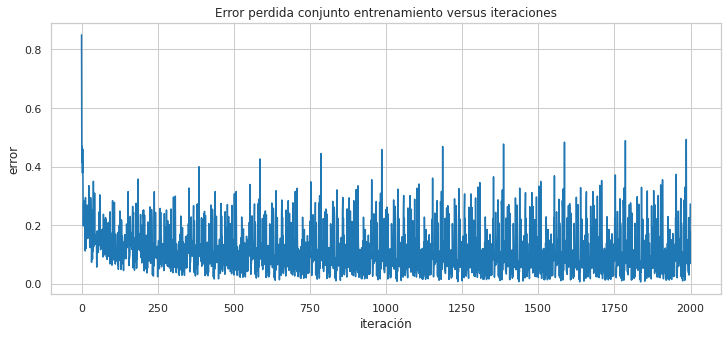

In [11]:
from plot import plot_error

plot_error(sgd1.loss,'perdida conjunto entrenamiento')

Epoca 1 de 10
Epoca 2 de 10
Epoca 3 de 10
Epoca 4 de 10
Epoca 5 de 10
Epoca 6 de 10
Epoca 7 de 10
Epoca 8 de 10
Epoca 9 de 10
Epoca 10 de 10


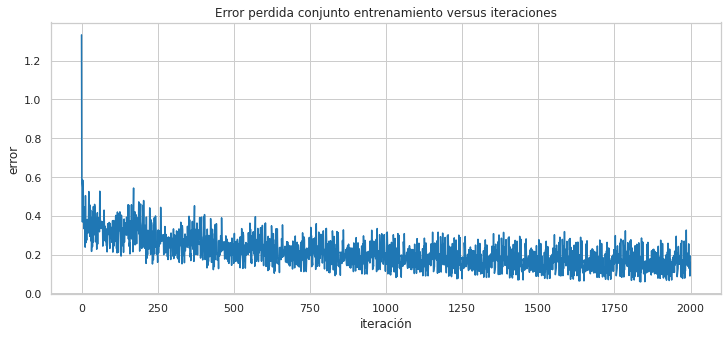

In [12]:
modelo2 = RegresionLogistica(2)
perdida = nn.BCELoss()
sgd2 = SGD(gamma(0.5,1),modelo2,perdida)
sgd2.fit(X_train,y_train,epochs=10,batchsize=20)
plot_error(sgd2.loss,'perdida conjunto entrenamiento')

> 4.b - Genere un conjunto de test que distribuya del mismo modo que el conjunto de entrenamiento (dos Gaussianas).  Uselos para computar el error en tal conjunto usando su modelo optimizado.

In [13]:
N_test = 1000

values_test = Binomial(probs=torch.tensor([0.5])).sample(torch.tensor([N_test]))
n1_test = (values_test== 0).sum().reshape((1,))
n2_test = (values_test == 1).sum().reshape((1,))
samples1_test = MultivariateNormal(torch.zeros(2), torch.tensor([[1,0],[0,2.5]])).sample(n1_test)
samples2_test = MultivariateNormal(torch.tensor([3.,3.]), torch.tensor([[1,0],[0,2.5]])).sample(n2_test)

samples_test = np.zeros((N_test,2))
samples_test[(values_test==0).numpy()[:,0]] = samples1_test.numpy()
samples_test[(values_test==1).numpy()[:,0]] = samples2_test.numpy()

X_test = torch.cat((samples1_test,samples2_test))
y_test = torch.cat((torch.Tensor([0 for _ in range(n1_test)]),torch.Tensor([1 for _ in range(n2_test)])))
indices_test = torch.randperm(N_test)
X_test = torch.index_select(X_test, 0, indices_test)
y_test = torch.index_select(y_test, 0, indices_test)

In [14]:
pred_test = modelo(X_test)[:,0]
perdida1 = perdida(pred_test, y_test)
print("Perdida modelo 1 entropía-cruzada en conjunto test = {}".format(perdida1.item()))

Perdida modelo 1 entropía-cruzada en conjunto test = 0.09331037104129791


In [15]:
pred_test = modelo2(X_test)[:,0]
perdida2 = perdida(pred_test, y_test)
print("Perdida modelo 2 entropía-cruzada en conjunto test = {}".format(perdida2.item()))

Perdida modelo 2 entropía-cruzada en conjunto test = 0.15195512771606445
